In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from termcolor import colored
def test(y, x, ch):
    # sum 10 adjacent bands for a single spectrum
    y_sum = y.reshape(ch, -1)

    # Analysis
    averages = []
    stds = []
    cvs = []
    for i in range(y_sum.shape[0]):
        averages.append(np.mean(y_sum[i]))
        stds.append(np.std(y_sum[i]))
        cvs.append(stds[i] / averages[i])

    # Properties
    print("--- " + colored('Properties', 'green'), " " + 79 * "-")
    print("Hyperspectral channels: ", y.shape[0])
    print("MultiSpectra channels: ", len(averages))
    # print(f"{averages=}")
    # print(f"{stds=}")
    # print(cvs)
    l = len(averages)
    # Results
    print("--- " + colored('Results', 'red'), " " + 82 * "-")
    print(f"Relative deviations from conversion (%): ")
    print(f"{['{:.2f}'.format(std / avg * 100) for std, avg in zip(stds, averages)]} \n")
    print(f"Min: {format(cvs[np.argmin(cvs)] * 100, '.2f')}% -- Max: {format(cvs[np.argmax(cvs)] * 100, '.2f')}%",
          f"-- Avg: {format(np.average(cvs) * 100, '.2f')}%")
    print(f"Wavelength range per channel: {600/ch} nm")

    # Graphics
    plt.plot(x, y, color='black', label= 'Grape')
    #plt.plot(wl,mean_spectrum_fake_green1, label='Fake Green Apples - Multi', color='blue')
    plt.bar(x=np.linspace(380 + (648/(2*ch)), 1028 - (648/(2*ch)), l), 
            height=averages, 
            width=648/ch - 2, 
            color=['green' if (index==0 or index==3 or index==l-10 or index==l-6 or index==l-4 or index==l-1) else 'white' 
                   for index in range(len(averages))])
    plt.errorbar(x=np.linspace(380 + (648/(2*ch)), 1028 - (648/(2*ch)), l), 
                 y=averages, 
                 yerr=stds, 
                 linestyle='None', 
                 marker='o', 
                 color='red')
    plt.ylim(0,0.7)
    plt.legend()
    plt.show()
    
# TEST
#test(mean_spectrum_fake_green[:200], wl1[:200], 10)

In [69]:
data = pd.read_csv('grape_spec.csv')

In [70]:
data.head()

,spec
0,0.45236
1,0.45621
2,0.45332
3,0.45115
4,0.45526


In [71]:
data.shape

(1040, 1)

--- Properties  -------------------------------------------------------------------------------
Hyperspectral channels:  1040
MultiSpectra channels:  16
--- Results  ----------------------------------------------------------------------------------
Relative deviations from conversion (%): 
['1.63', '9.59', '12.74', '8.82', '0.52', '1.49', '0.70', '0.86', '18.82', '13.21', '9.18', '2.32', '0.69', '1.66', '12.32', '4.67'] 

Min: 0.52% -- Max: 18.82% -- Avg: 6.20%
Wavelength range per channel: 37.5 nm


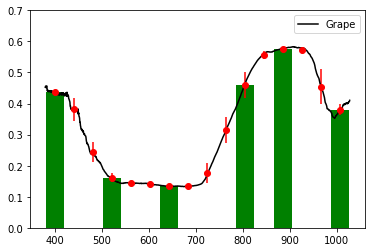

In [72]:
wl1 = np.linspace(380,109
                  ,1040)
test(data['spec'].to_numpy(), wl1, 16)

In [17]:
std = np.std([1.63,8.82,0.70,9.18,0.69,4.67])
s = "{:.2f}".format(std)
print(f"Error (%) for the selected channels: ({(1.63 + 8.82 + 0.70 + 9.18 + 0.69 + 4.67)/6:.2f} ± " + s +")%")

<IPython.core.display.Javascript object>

Error (%) for the selected channels: (4.28 ± 3.59)%


In [ ]:
# Desvios relativos serao inferiores a 10% em todas as bandas selecionadas